# Lab 09 - Regression
## Sam Bacon - March 10, 2021
### Predicting continuous values using regression

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [11]:
# read in data
csv = 'https://drive.google.com/uc?export=download&id=1XHF2E7uXPqXSmGi2X1E9_o9VmIh89bfV'
df = pd.read_csv(csv)
len(df)

600

In [12]:
# create variables
xtrain = df['x'][df['is_train'] == 1].values.reshape((-1, 1))
ytrain = df['y'][df['is_train'] == 1].values.reshape((-1, 1))
xtest = df['x'][df['is_train'] == 0].values.reshape((-1, 1))
ytest = df['y'][df['is_train'] == 0].values.reshape((-1, 1))
xtrain.size


500

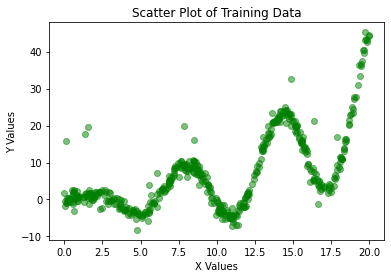

In [ ]:
# scatter plot of training data
plt.scatter(xtrain, ytrain, marker='o', color='g', alpha=0.5)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of Training Data')
plt.show()

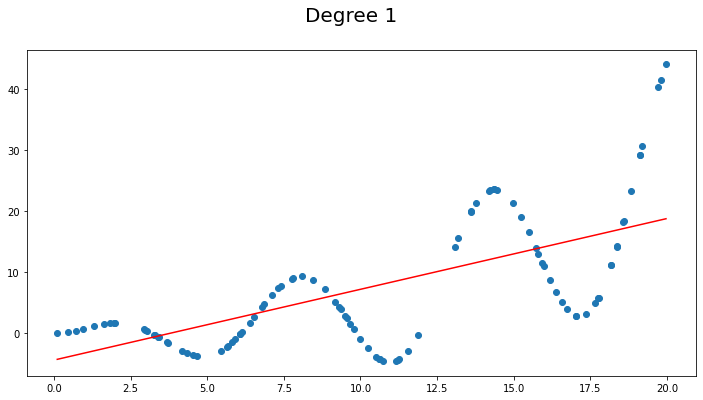

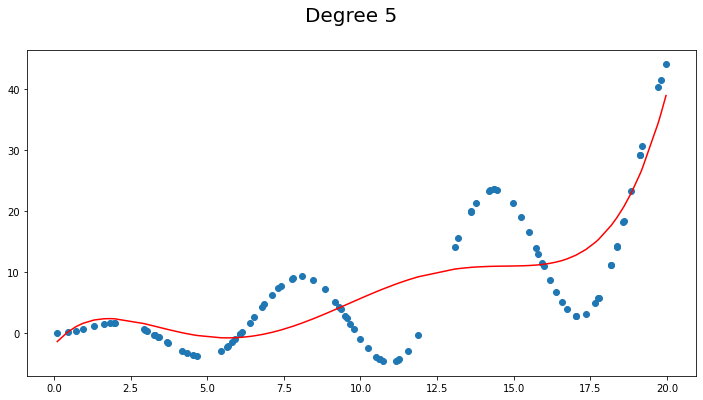

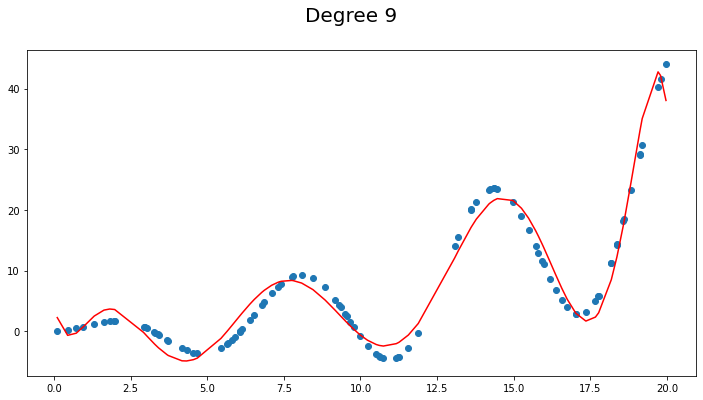

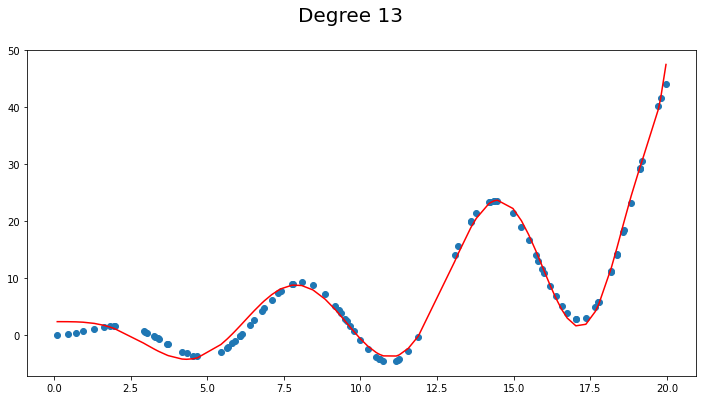

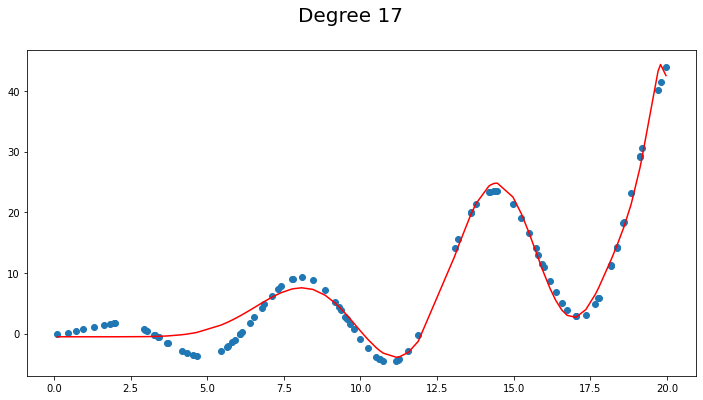

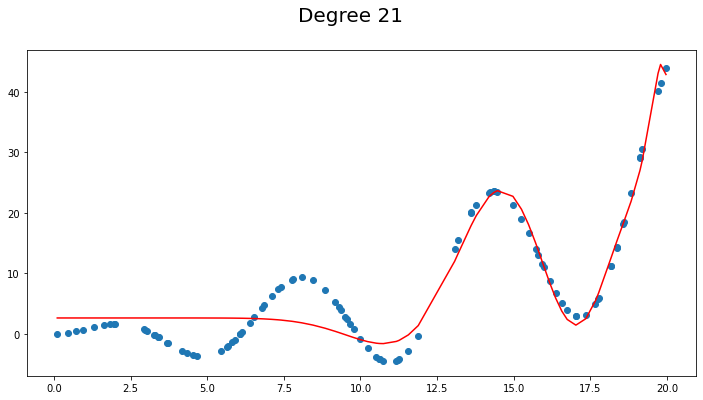

In [ ]:
# polynomial regression model

for i in range(1,22,4):
  poly_model = make_pipeline(PolynomialFeatures(i),
                           LinearRegression())
  poly_model.fit(xtrain, ytrain)

# Predict the test data
  yfit = poly_model.predict(xtest)

# Show predictions on top of the random data
  plt.figure(figsize=(12,6))
  plt.suptitle("Degree {}".format(i), fontsize = 20)
  plt.scatter(xtest, ytest)
  plt.plot(xtest, yfit, 'r')

In [13]:
# evaluate in terms of MAE
for i in range(1,20,1):
  poly_model = make_pipeline(PolynomialFeatures(i),
                            LinearRegression())

  poly_model.fit(xtrain, ytrain)
  ypred = poly_model.predict(xtest)

  mae = mean_absolute_error(ytest, ypred)
  mse = mean_squared_error(ytest, ypred)

  print('Degree = {} - MAE: {:.4f}, MSE: {:.4f}'.format(i,mae, mse))

Degree = 1 - MAE: 6.2029, MSE: 63.5673
Degree = 2 - MAE: 5.7396, MSE: 54.8533
Degree = 3 - MAE: 5.7474, MSE: 54.1178
Degree = 4 - MAE: 5.5844, MSE: 50.4123
Degree = 5 - MAE: 5.0749, MSE: 41.8381
Degree = 6 - MAE: 4.5953, MSE: 29.1619
Degree = 7 - MAE: 4.4224, MSE: 28.4129
Degree = 8 - MAE: 4.0010, MSE: 19.5637
Degree = 9 - MAE: 1.8886, MSE: 4.4704
Degree = 10 - MAE: 1.8722, MSE: 4.1342
Degree = 11 - MAE: 0.5027, MSE: 0.3710
Degree = 12 - MAE: 0.6474, MSE: 0.6029
Degree = 13 - MAE: 0.9709, MSE: 1.4076
Degree = 14 - MAE: 0.4930, MSE: 0.4853
Degree = 15 - MAE: 1.6709, MSE: 4.6214
Degree = 16 - MAE: 1.2162, MSE: 3.2039
Degree = 17 - MAE: 1.3363, MSE: 2.7831
Degree = 18 - MAE: 1.7428, MSE: 4.2450
Degree = 19 - MAE: 2.1488, MSE: 6.5557


The lowest MAE value is 0.5027, which occurs with a 11th degree polynomial model.

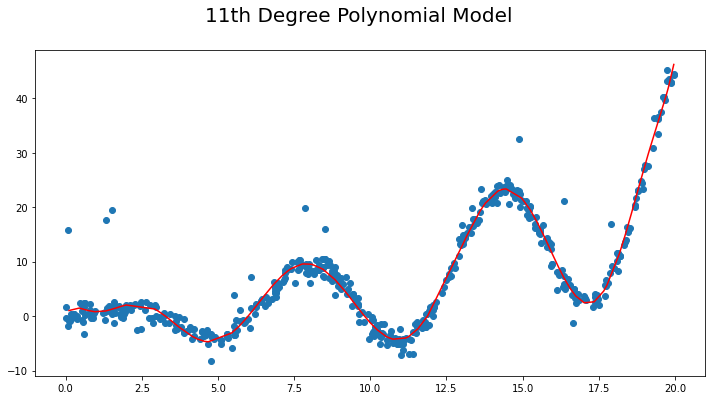

In [ ]:
# Visualizing the 11th degree polynomial model

poly_model = make_pipeline(PolynomialFeatures(11),
                           LinearRegression())
poly_model.fit(xtrain, ytrain)

# Predict the test data
yfit = poly_model.predict(xtest)

# Show predictions on top of the random data
plt.figure(figsize=(12,6))
plt.suptitle("11th Degree Polynomial Model", fontsize = 20)
plt.scatter(xtrain, ytrain)
plt.plot(xtest, yfit, 'r')
